<a href="https://colab.research.google.com/github/sujithgunturu/Math799/blob/master/sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from sympy import *
init_printing(use_unicode=True)

Adding symbols for all the data

In [76]:
S_xl,S_vt,S_at,S_wt, theta_vr,theta_vd, theta_vo, theta_vs, theta_vq, theta_ps, theta_a, theta_pr, \
theta_pm, theta_tr, theta_td, theta_t0, theta_alpha, theta_el, theta_k, theta_sr,\
theta_sm, theta_rue, theta_m, theta_gx, theta_gb, theta_ts, W_at, W_pt, S_lt, W_st, S_yt, S_gt, W_xt, W_nt, W_ht, W_wt, k_i, k_m, k_e, W_rt\
= symbols('S_xl S_vt S_at S_wt theta_vr theta_vd theta_vo theta_vs theta_vq theta_ps \
theta_a theta_pr theta_pm theta_tr, theta_td, theta_t0, theta_alpha, theta_el, theta_k\
 theta_sr theta_sm theta_rue theta_m theta_gx theta_gb theta_ts W_at W_pt S_lt W_st S_yt S_gt W_xt W_nt W_ht W_wt k_i k_m k_e W_rt|')

1) Cumulative vernalization (Sv)


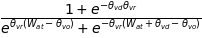

In [61]:
dSvt_dt = (1 + exp(-1 * theta_vr * theta_vd))/(exp((-1 * theta_vr * (W_at - theta_vo + theta_vd))) + (exp( (theta_vr) * (W_at - theta_vo) ) - 1) + 1)
dSvt_dt

2)Physiological age (Sa)


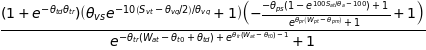

In [62]:
f_vt = 1 - (theta_vs*(1- (1/1+exp((-10/theta_vq )* (S_vt- (theta_vq/2))))))
f_pt = 1 - (1 - theta_ps * (1- (1 / (exp(-100 * (( S_at/theta_a)-1) ))) )) * (1/(1 + exp(theta_pr*(W_pt - theta_pm))))
d_tt = (1 + exp(-1 * theta_tr * theta_td)) / (1 + exp(-1 * theta_tr *(W_at - theta_t0 + theta_td) + exp((theta_tr * (W_at - theta_t0)) -1)))
dSat_dt = f_vt * f_pt * d_tt
dSat_dt

3)Leaf area index (Sl)

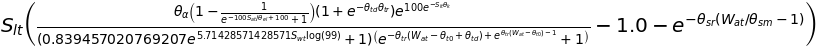

In [63]:
f_wt = 1 / (1 + exp((ln(99)/0.175)*S_wt - 0.175))
dSlt_dt = S_lt * (d_tt*theta_alpha*f_wt*(1 - (1/(1+exp(-1* 100 * ((S_at/theta_el) -1)))))* (1/exp(-1 * 100 *(exp(-1 * theta_k * S_lt)))) - (1/1+exp(-1 * theta_sr * (W_at/theta_sm - 1) )))
dSlt_dt

4) Biomass (Sb)

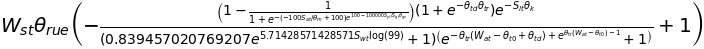

In [64]:
dSbt_dt = theta_rue * W_st * (1- exp(-1*theta_k * S_lt) * f_wt* d_tt * (1- (1/ (1+exp(-100 * (S_at/theta_m -1)*(1-(1/1+exp(-100*((1000 * S_yt) /(theta_gx *S_gt) -1)))) )) ) ))
dSbt_dt


5) Grain number (Sg)

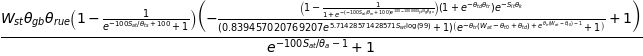

In [65]:
dSgt_dt = dSbt_dt * theta_gb * (1 / (1 + exp(-1 * 100 * (S_at/theta_a)-1))) * (1 - (1/(1+exp(-1 * 100 * (S_at/theta_ts -1)))))
dSgt_dt 

6) Yield (S)

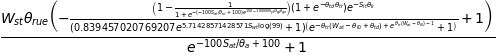

In [66]:
dSyt_dt = dSbt_dt * (1/ (1+exp(-1 * 100* (S_at/theta_a -1))))
dSyt_dt

7)Soil water (Sw)

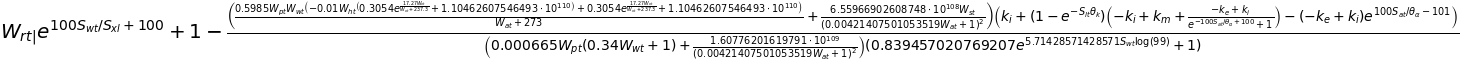

In [84]:
D_t = (4098 * 0.6108 * exp((17.27 * W_at)/W_at+237.3))/(W_at + 237.3)**2
e_st = 0.6108 * (exp((17.27 * W_xt)/(W_xt + 237.3)) + exp((17.27 * W_nt)/W_nt +237.3)) /2 
e_at = e_st * W_ht * 0.01
gamma_t = 0.665 * 10**-3 * W_pt
e0_t = ((0.408 * D_t * W_st) + (gamma_t * (900/(W_at + 273) * W_wt* (e_st - e_at))))/(D_t + gamma_t * (1+ 0.34 * W_wt))  


k_ct = k_i + (1-exp(-1 * theta_k * S_lt)) * (k_m - k_i + (k_i-k_e)/(exp(-1 * 100 * (S_at/theta_alpha - 1) ) +1) ) - ( (k_i - k_e) / exp(-1 * 100 * (S_at/theta_alpha -1) +1))


e_ct = e0_t * k_ct

dSwt_dt = (W_rt/exp(-1 * 100 * (S_wt/S_xl + 1) ) + 1) - (e_ct * f_wt)

dSwt_dt

In [ ]:
diff(dS_dT, theta_vr)
diff(dS_dT, theta_vd)
diff(dS_dT, theta_vo)
diff(dS_dT, W_at)

In [79]:
F = sympy.Matrix([dSvt_dt,dSat_dt,dSlt_dt,dSbt_dt,dSgt_dt,dSyt_dt,dSwt_dt ])

In [83]:
F.jacobian([S_xl, theta_vr, theta_vd, theta_vo, 
            theta_vs, theta_vq, theta_ps, theta_a,
            theta_pr, theta_pm, theta_tr, theta_td, 
            theta_t0, theta_alpha, theta_el, theta_k,
            theta_sr, theta_sm, theta_rue, theta_m,
            theta_gx, theta_gb, theta_ts]).shape